## ACF & PACF

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
data = [10,20,30,40,50,10,20,30,40,50]
Z = np.array(data)
mean = Z.mean()
Z = Z - mean
Z_Dash = np.transpose(Z)
R = np.dot(Z[:,None],Z_Dash[None,:])

In [38]:
# Главная диагональ матрицы — это (X_i - mean)^2.
R

array([[ 400.,  200.,    0., -200., -400.,  400.,  200.,    0., -200.,
        -400.],
       [ 200.,  100.,    0., -100., -200.,  200.,  100.,    0., -100.,
        -200.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [-200., -100.,    0.,  100.,  200., -200., -100.,    0.,  100.,
         200.],
       [-400., -200.,    0.,  200.,  400., -400., -200.,    0.,  200.,
         400.],
       [ 400.,  200.,    0., -200., -400.,  400.,  200.,    0., -200.,
        -400.],
       [ 200.,  100.,    0., -100., -200.,  200.,  100.,    0., -100.,
        -200.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [-200., -100.,    0.,  100.,  200., -200., -100.,    0.,  100.,
         200.],
       [-400., -200.,    0.,  200.,  400., -400., -200.,    0.,  200.,
         400.]])

In [39]:
# Сумма произведений средних значений, где 1 элемент без сдвига. Каждый следующий со сдвигом.
# 1 элемент массива это дисперсия умноженная на число элементов массива, каждый следующий ковариация X и X_l
l = len(data)
slist = []
for i in range(0,l) :
    s = 0
    for j in range(0,l-i) :
        s = s + R[j+i][j]
    slist.append(s)
print(slist)

[2000.0, 400.0, -600.0, -900.0, -400.0, 1000.0, 400.0, -100.0, -400.0, -400.0]


[1.0, 0.2, -0.3, -0.45, -0.2, 0.5, 0.2, -0.05, -0.2, -0.2]


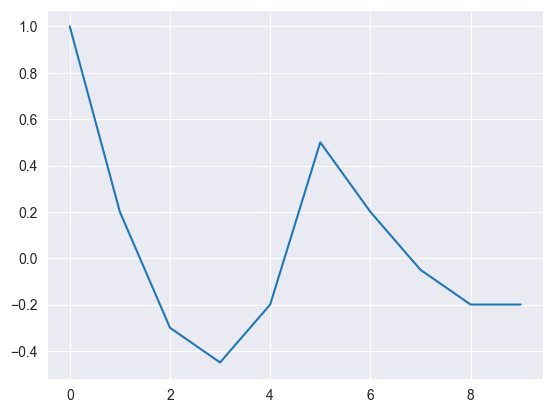

In [40]:
# Находим автокорреляцию делим ковариацию на дисперсию, каждый следующий элемент сдвиг на 1 лаг.
aclist = [i / slist[0] for i in slist]
print(aclist)
plt.plot(aclist)
plt.show()

In [62]:
# Устанавливаем сдвиг с заданным лагом.
lag = 8
acvf_lags = slist[1:lag+1]
acvf_lags

[400.0, -600.0, -900.0, -400.0, 1000.0, 400.0, -100.0, -400.0]

In [63]:
mat = np.zeros((lag, lag))

In [64]:
# Создаем матрицу с оставшимися элементами из массива slist:
# общая дисперсия + ковариация, которая не попала в acvf_lags.
for i in range(0,lag) :
    for j in range(0,lag-i) :
        mat[j+i][j] = slist[i]
        mat[j][j+i] = slist[i]
mat

array([[2000.,  400., -600., -900., -400., 1000.,  400., -100.],
       [ 400., 2000.,  400., -600., -900., -400., 1000.,  400.],
       [-600.,  400., 2000.,  400., -600., -900., -400., 1000.],
       [-900., -600.,  400., 2000.,  400., -600., -900., -400.],
       [-400., -900., -600.,  400., 2000.,  400., -600., -900.],
       [1000., -400., -900., -600.,  400., 2000.,  400., -600.],
       [ 400., 1000., -400., -900., -600.,  400., 2000.,  400.],
       [-100.,  400., 1000., -400., -900., -600.,  400., 2000.]])

In [65]:
# Берем обратную матрицу.
ainv = np.linalg.inv(mat)
ainv

array([[ 9.65135369e-04, -2.97258744e-04,  2.50643145e-04,
         2.13769881e-04,  2.45169348e-04, -4.92720980e-04,
         2.88012715e-04, -6.99517095e-05],
       [-2.97258744e-04,  1.05162015e-03, -3.53581293e-04,
         1.49090923e-04,  1.56028015e-04,  4.12419656e-04,
        -5.63261739e-04,  2.88012715e-04],
       [ 2.50643145e-04, -3.53581293e-04,  1.03076366e-03,
        -1.51029539e-04,  1.39598085e-04, -3.57228896e-05,
         4.12419656e-04, -4.92720980e-04],
       [ 2.13769881e-04,  1.49090923e-04, -1.51029539e-04,
         8.26568050e-04,  2.84374136e-05,  1.39598085e-04,
         1.56028015e-04,  2.45169348e-04],
       [ 2.45169348e-04,  1.56028015e-04,  1.39598085e-04,
         2.84374136e-05,  8.26568050e-04, -1.51029539e-04,
         1.49090923e-04,  2.13769881e-04],
       [-4.92720980e-04,  4.12419656e-04, -3.57228896e-05,
         1.39598085e-04, -1.51029539e-04,  1.03076366e-03,
        -3.53581293e-04,  2.50643145e-04],
       [ 2.88012715e-04, -5.632617

[ 0.30058298 -0.22917183 -0.27371409 -0.22804113  0.53317688 -0.27185202
  0.04097312  0.10229169]


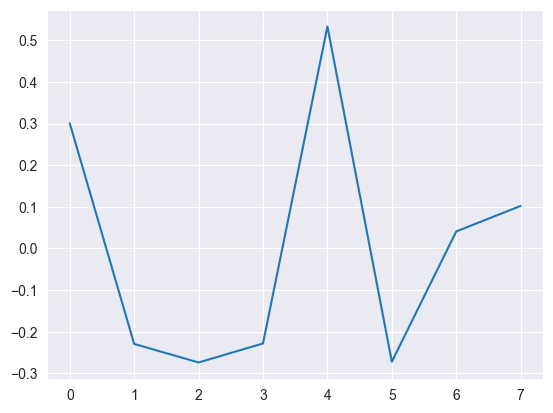

In [66]:
# Выполняем матричное умножение.
result = np.matmul(ainv,acvf_lags)
print(result)
plt.plot(result)
plt.show()

### Готовые методы

In [67]:
import statsmodels.api as sm

[ 1.    0.2  -0.3  -0.45 -0.2   0.5   0.2  -0.05 -0.2  -0.2 ]


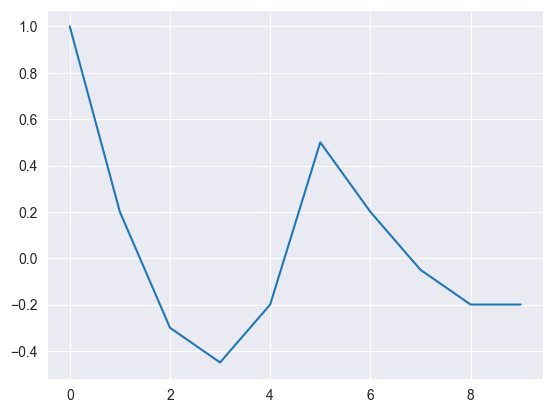

In [68]:
acorr = sm.tsa.acf(data)
print(acorr)
plt.plot(acorr)
plt.show()

[ 1.          0.22222222 -0.44642857 -0.55588139 -0.50024995]


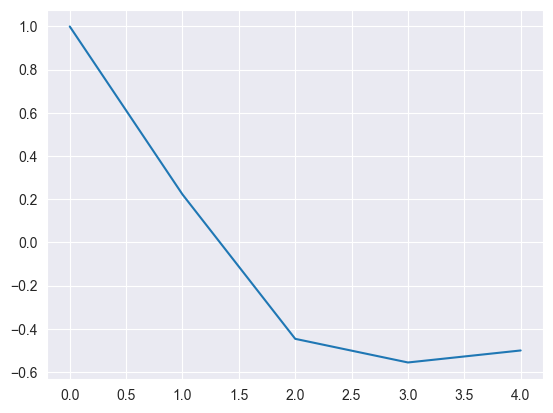

In [70]:
pacorr = sm.tsa.pacf(data)
print(pacorr)
plt.plot(pacorr)
plt.show()